In [2]:
# needed packages
import scipy.io as sio
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
import cv2
from math import sqrt
from scipy.stats import mode
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# read in all data from Matlab files
dataset = "input.mat"
file = sio.loadmat(dataset)
inputImages = file['data']
label = file['labels']
images = np.transpose(inputImages)

In [4]:
# split the data
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages, label, test_size=0.1)

In [5]:
def euclideanDistance(x_a, x_b):
    # Calculates the Euclidean distance between two vectors
    
    x_a = np.asarray(x_a)
    x_b = np.asarray(x_b)
    
    distance = 0;
    distance = np.subtract(x_a,x_b)  
    distance = np.power(distance,2)
    distance = np.sum(distance)
    distance = np.sqrt(distance);

    return distance

In [6]:
def calculateDistances(x_test, X_in):
    # Calculates the distance between a single test example, x_test, and a list of examples X_in. 
    
    distance_list = []
   
    for i in X_in:
        distance_list.append(euclideanDistance(x_test, i))
    
    return distance_list

In [7]:
def kNearestIndices(distance_list, k):
    # Determines the indices of the k nearest neighbours

    wholeOrder = np.argsort(distance_list);
    k_nearest_indices = [];
    
    for j in range(k):
        k_nearest_indices.append(wholeOrder[j]);
    
    k_nearest_indices = np.array(k_nearest_indices)
    
    return k_nearest_indices

In [8]:
def kNearestNeighbours(k_nearest_indices, X_in, Y_in):
    # Creates the dataset of k nearest neighbours

    X_k = [];
    Y_k = [];
        
    for k in k_nearest_indices:
        X_k.append(X_in[k]);
        Y_k.append(Y_in[k]);
    
    X_k = np.array(X_k);
    Y_k = np.array(Y_k);

    return X_k, Y_k

In [9]:
def predict(x_test, X_in, Y_in, k):
    # Predicts the class of a single test example

    distances = calculateDistances(x_test, X_in)
    nearestIndices = kNearestIndices(distances, k)
    Xk, Yk = kNearestNeighbours(nearestIndices, X_in, Y_in)
    prediction = mode(Yk)[0]
    #print(prediction)
    return prediction

In [10]:
def predictBatch(X_t, X_in, Y_in, k):
    #Performs predictions over a batch of test examples
 
    predictions = [];
    for j in X_t:
            predictions.append(predict(j, X_in, Y_in, k));
    
    predictions = np.array(predictions);
    predictions = predictions.flatten();
    
    return predictions

In [11]:
def accuracy(Y_pred, Y_test):
    # Calculates the accuracy of the model

    correctPredictions = 0;
    totalExamples = Y_pred.shape[0];

    for z in range(totalExamples):
        if Y_pred[z] == Y_test[z]:
            correctPredictions = correctPredictions + 1;
    
    accuracy = correctPredictions/totalExamples;
    
    return accuracy

In [12]:
def run(X_train, X_test, Y_train, Y_test, k):
    # Evaluates the model on the test data
    
    runPredictions = predictBatch(X_test, X_train, Y_train, k);
    test_accuracy = accuracy(runPredictions, Y_test);
    
    return test_accuracy

In [ ]:
# The next 5 cells run through different data set sizes and plot the accuracy for these over different k values

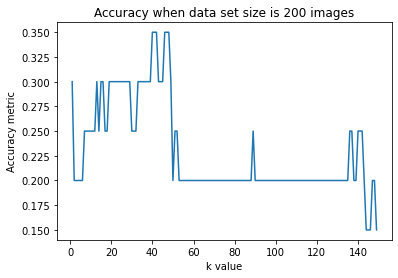

Max accuracy at k=40 accuracy of 0.35


In [35]:
# 200 input images
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages[0:200,:], label[0:200,:], test_size=0.1)
x = []
y = []
index=0
acc=0

for k in range(1, 150):
    y.append(run(X_train, X_validation, Y_train, Y_validation, k+1))
    if y[k-1]>acc:
        acc=y[k-1]
        index=k-1
    x.append(k)

plt.plot(x, y)
plt.title("Accuracy when data set size is 200 images")
plt.xlabel("k value")
plt.ylabel("Accuracy metric")
plt.show()
print("Max accuracy at k="+str(index+1)+" accuracy of "+str(acc))

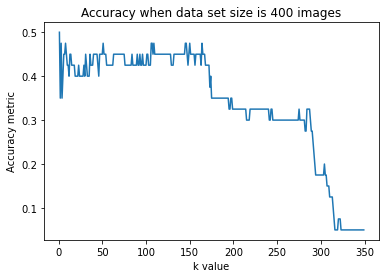

Max accuracy at k=1 accuracy of 0.5


In [36]:
# 400 input images
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages[0:400,:], label[0:400,:], test_size=0.1)
x = []
y = []
index=0
acc=0

for k in range(1, 350):
    y.append(run(X_train, X_validation, Y_train, Y_validation, k+1))
    if y[k-1]>acc:
        acc=y[k-1]
        index=k-1
    x.append(k)

plt.plot(x, y)
plt.title("Accuracy when data set size is 400 images")
plt.xlabel("k value")
plt.ylabel("Accuracy metric")
plt.show()
print("Max accuracy at k="+str(index+1)+" accuracy of "+str(acc))

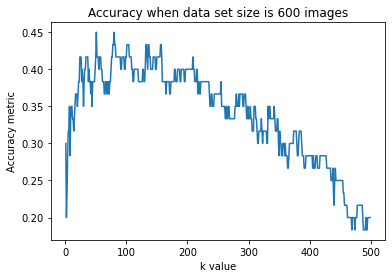

Max accuracy at k=51 accuracy of 0.45


In [38]:
# 600 input images
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages[0:600,:], label[0:600,:], test_size=0.1)
x = []
y = []
index=0
acc=0

for k in range(1, 500):
    y.append(run(X_train, X_validation, Y_train, Y_validation, k+1))
    if y[k-1]>acc:
        acc=y[k-1]
        index=k-1
    x.append(k)

plt.plot(x, y)
plt.title("Accuracy when data set size is 600 images")
plt.xlabel("k value")
plt.ylabel("Accuracy metric")
plt.show()
print("Max accuracy at k="+str(index+1)+" accuracy of "+str(acc))

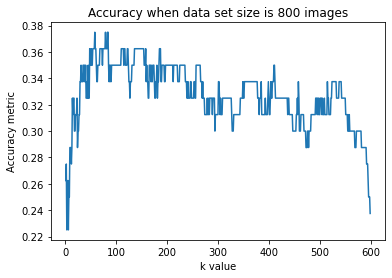

Max accuracy at k=58 accuracy of 0.375


In [39]:
# 800 input images
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages[0:800,:], label[0:800,:], test_size=0.1)
x = []
y = []
index=0
acc=0

for k in range(1, 600):
    y.append(run(X_train, X_validation, Y_train, Y_validation, k+1))
    if y[k-1]>acc:
        acc=y[k-1]
        index=k-1
    x.append(k)

plt.plot(x, y)
plt.title("Accuracy when data set size is 800 images")
plt.xlabel("k value")
plt.ylabel("Accuracy metric")
plt.show()
print("Max accuracy at k="+str(index+1)+" accuracy of "+str(acc))

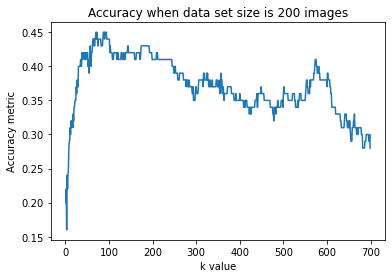

Max accuracy at k=70 accuracy of 0.45


In [41]:
# 800 input images
X_train, X_validation, Y_train, Y_validation = train_test_split(inputImages[0:1000,:], label[0:1000,:], test_size=0.1)
x = []
y = []
index=0
acc=0

for k in range(1, 700):
    y.append(run(X_train, X_validation, Y_train, Y_validation, k+1))
    if y[k-1]>acc:
        acc=y[k-1]
        index=k-1
    x.append(k)

plt.plot(x, y)
plt.title("Accuracy when data set size is 200 images")
plt.xlabel("k value")
plt.ylabel("Accuracy metric")
plt.show()
print("Max accuracy at k="+str(index+1)+" accuracy of "+str(acc))